
- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Celsius to Fahrenheit.csv to Celsius to Fahrenheit.csv


In [ ]:
data=pd.read_csv("Celsius to Fahrenheit.csv")

In [ ]:
data.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


###  STEP 2: VISUALIZE DATASET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


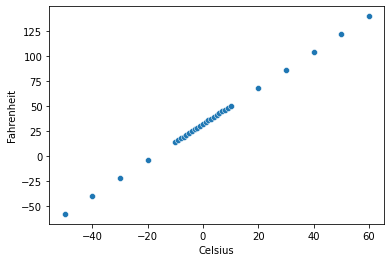

In [ ]:
sns.scatterplot(data['Celsius'], data['Fahrenheit'])

In [ ]:
X_train = data['Celsius']
y_train = data['Fahrenheit']

 STEP4: BUILD AND TRAIN THE MODEL

In [ ]:
X_train.shape

(30,)

In [ ]:
y_train.shape

(30,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1526.8893
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 1112.4690
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 954.0641
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 980.4900
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1043.9380
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 1040.7828
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 971.3583
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 877.4453
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 797.6910
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 752.7307
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 741.3810
Epoch 12/200
1/1 [==============================] - 0s 4ms/step - loss: 745.1303
Epoch 13/200
1/1 [================

# STEP#5: EVALUATING THE MODEL 

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

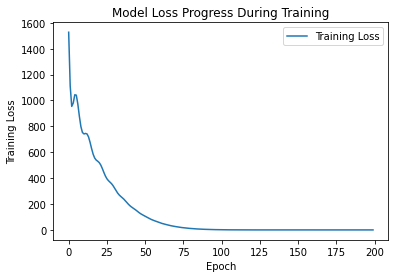

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[1.7999656]], dtype=float32), array([32.00259], dtype=float32)]

In [ ]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


Temperature in degF Using Trained ANN = [[32.00259]]


In [ ]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0
